In [9]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [12]:
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [16]:
zip_path = "archive.zip"   # Your uploaded file path

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_dataset")

print("ZIP extracted successfully!")

ZIP extracted successfully!


In [17]:
csv_path = None
for root, dirs, files in os.walk("extracted_dataset"):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            break

print("CSV File Found at:", csv_path)


CSV File Found at: extracted_dataset/bank.csv


In [18]:
data = pd.read_csv(csv_path)

print("\nDataset Loaded Successfully!")
print(data.head())


Dataset Loaded Successfully!
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [20]:
# If columns look merged, reload with sep=';'
if data.shape[1] == 1:
    data = pd.read_csv(csv_path, sep=';')

In [21]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print("\nCategorical columns encoded!")


Categorical columns encoded!


In [22]:
# Assumes last column is target if 'y' not found
if 'y' in data.columns:
    X = data.drop('y', axis=1)
    y = data['y']
else:
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [24]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

print("\nDecision Tree Model Trained Successfully!")


Decision Tree Model Trained Successfully!


In [25]:
y_pred = dt_model.predict(X_test)

In [26]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.8044192296207823

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1742
           1       0.79      0.81      0.80      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



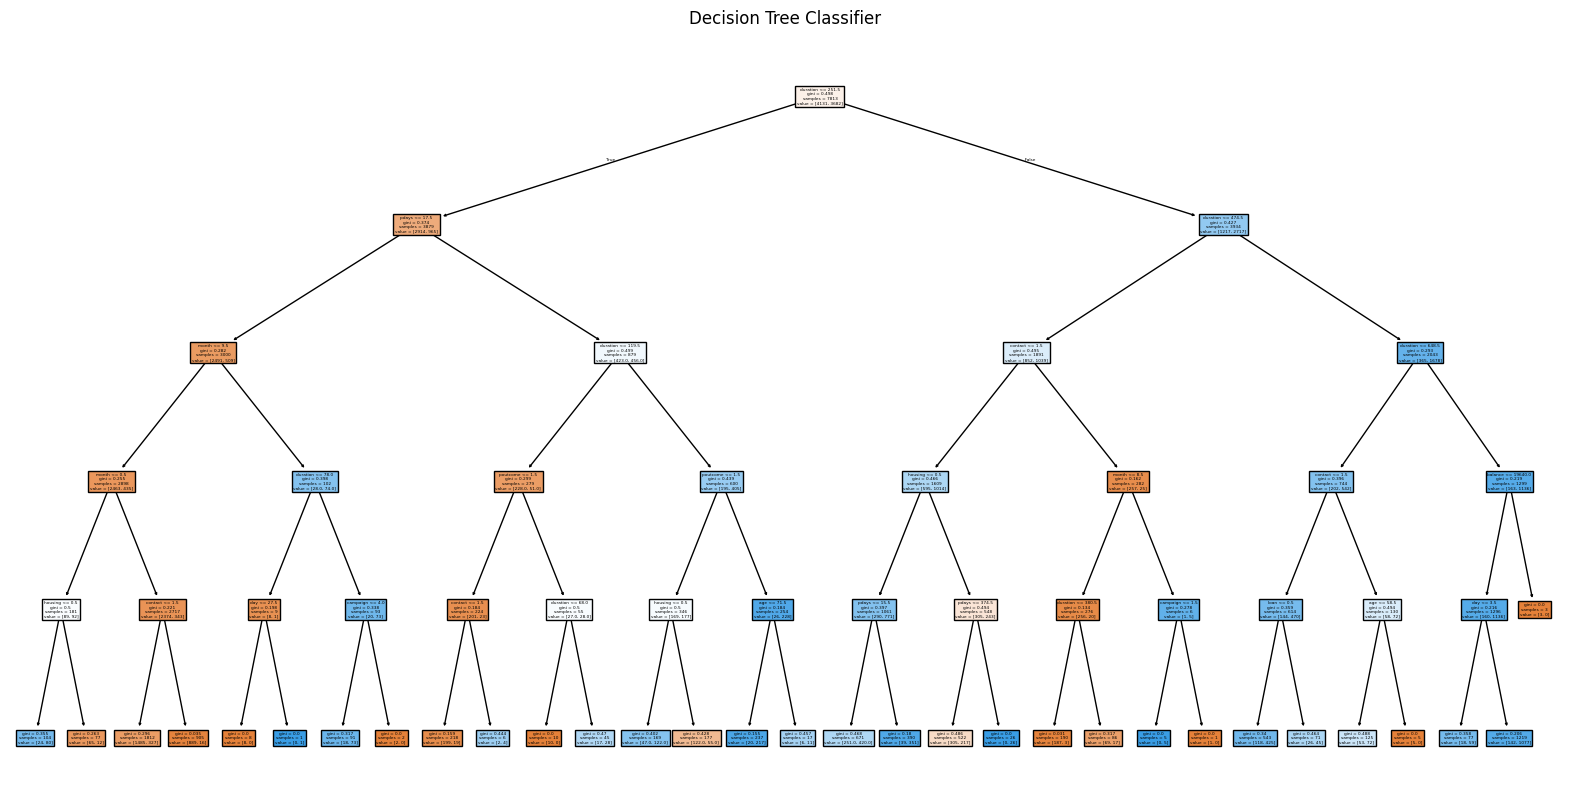

In [33]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree Classifier")
plt.show()